## Análisis Exploratorio de Datos (EDA)


Llevaremos a cabo el EDA en cada conjunto de datos que ya transformamos. El objetivo es tener una vision de como se comportan los datos para luego poder hacer un modelo de recomendacion, el cual se ajuste lo mas posible a lo que buscamos.
Este enfoque sistematico garantiza una comprension detallada de los conjuntos de datos, permitiendo asi una correcta seleccion de los datos mas relevantes para nuestro modelo. 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pyarrow as pa 
import pyarrow.parquet as pq 
import warnings
warnings.filterwarnings('ignore')

EDA del dataframe 'steam_games.parquet'

In [2]:
df_steam_games = pd.read_parquet('dataset_limpio/steam_games.parquet')
df_steam_games.head()

,publisher,app_name,reviews_url,price,item_id,developer,release_year,genres
0,Kotoshiro,Lost Summoner Kitty,http://steamcommunity.com/app/761140/reviews/?...,4.99,761140,Kotoshiro,2018,Action
1,"Making Fun, Inc.",Ironbound,http://steamcommunity.com/app/643980/reviews/?...,0.00,643980,Secret Level SRL,2018,Free to Play
2,Poolians.com,Real Pool 3D - Poolians,http://steamcommunity.com/app/670290/reviews/?...,0.00,670290,Poolians.com,2017,Casual
3,彼岸领域,弹炸人2222,http://steamcommunity.com/app/767400/reviews/?...,0.99,767400,彼岸领域,2017,Action
4,Trickjump Games Ltd,Battle Royale Trainer,http://steamcommunity.com/app/772540/reviews/?...,3.99,772540,Trickjump Games Ltd,2018,Action


In [3]:
df_steam_games.info() #obtenemos informacion de las columnas y sus tipos de datos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28834 entries, 0 to 28833
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     23997 non-null  object 
 1   app_name      28834 non-null  object 
 2   reviews_url   28834 non-null  object 
 3   price         28834 non-null  float64
 4   item_id       28834 non-null  int64  
 5   developer     28834 non-null  object 
 6   release_year  28834 non-null  int64  
 7   genres        28834 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.8+ MB


In [4]:
#vemos la cantidad de nulos por columna
df_steam_games.isnull().sum()

publisher       4837
app_name           0
reviews_url        0
price              0
item_id            0
developer          0
release_year       0
genres             0
dtype: int64

### Variables categóricas

* **app_name**: nombre de la aplicación
* **item_id**: identificador único del juego
* **developer**: desarrollador del juego
* **release_year**: año de lanzamiento del juego
* **genres** : género del juego




### `id`

In [6]:
games_unique = len(df_steam_games['item_id'].unique()) #con esto obtenemos la cantidad de juegos unicos
games_unique

28834

**Observación**
- Steam posee la cantidad de 28834 juegos únicos en su catálogo.

### `developer`

In [7]:
developer_counts = df_steam_games['developer'].value_counts() #obtenemos la cantidad de jeugos por desarrollador
developer_counts

developer
Ubisoft - San Francisco       1259
SmiteWorks USA, LLC            813
Dovetail Games                 253
KOEI TECMO GAMES CO., LTD.     232
Paradox Development Studio     156
                              ... 
Royal9Games,RoyalJL              1
Salus Games                      1
Class of  2016-2017              1
Pirotexnik                       1
Bidoniera Games                  1
Name: count, Length: 10992, dtype: int64

Procedemos a hacer un grafico de barras para el top 10 de desarrolladores 

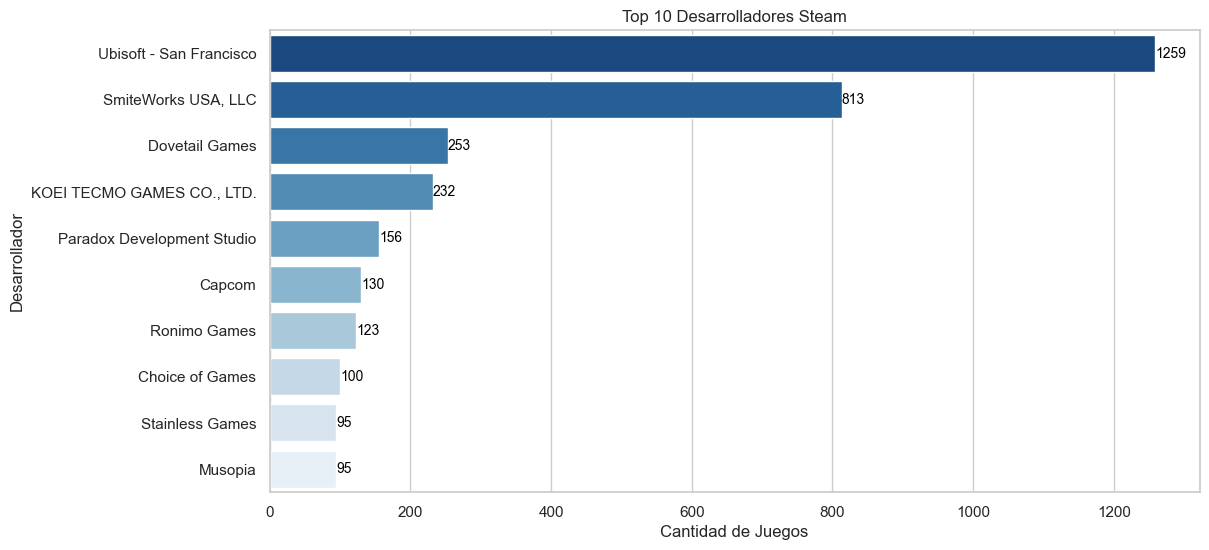

In [8]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))  # Tamaño de la figura

developer_data = developer_counts[:10]
sns.barplot(x=developer_data.values, y=developer_data.index, palette="Blues_r")

plt.xlabel('Cantidad de Juegos')
plt.ylabel('Desarrollador')
plt.title('Top 10 Desarrolladores Steam')

# Añadir los valores en las barras
for i, v in enumerate(developer_data.values):
    plt.text(v + 0.1, i, str(v), color='black', va='center', fontsize=10)

plt.show()


**Observación**
- Como podemos ver, 'Ubisoft - San Francisco' es el mayor desarrollador de juegos con 1259.

### `release_year`

In [9]:
#En primera instancia, veremos cuantos juegos hay por su año de lanzamiento
games_per_year = df_steam_games['release_year'].value_counts()
games_per_year

release_year
2017    9200
2016    6707
2015    5075
2014    2736
2013    1440
2012    1148
2011     551
2010     403
2009     317
2008     195
2007     150
2006     142
2018      92
2005      91
2003      74
2004      63
2001      57
1998      49
1999      45
2002      41
1997      39
1996      36
2000      35
1994      32
1995      31
1993      25
1992      13
1991      12
1990      10
1989       7
1988       5
1987       4
2019       3
1984       2
1983       1
1986       1
2021       1
1985       1
Name: count, dtype: int64

Procedemos a crear un grafico de barras para ver la cantidad de juegos por año de lanzamiento

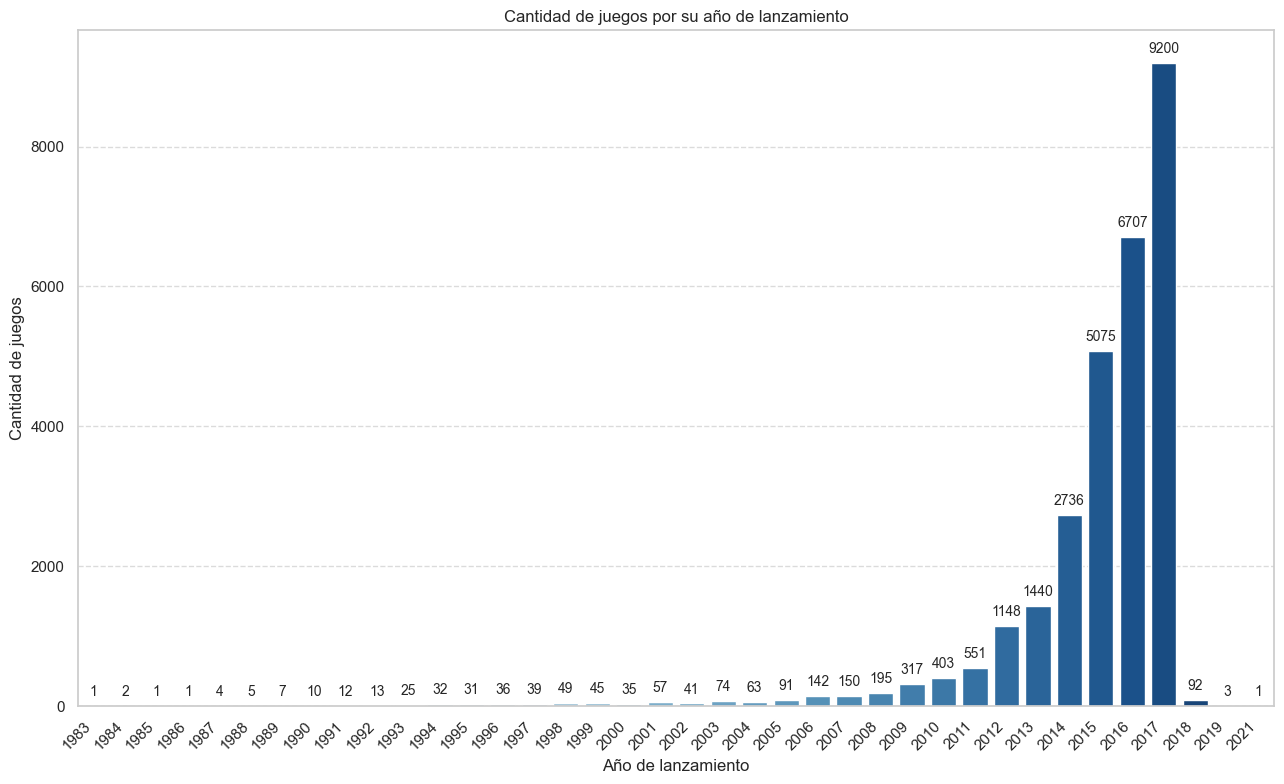

In [10]:
#creamos un grafico de barras para ver la info 
sns.set(style="whitegrid")

plt.figure(figsize=(13, 8))

ax = sns.barplot(x=games_per_year.index, y=games_per_year.values, palette="Blues")

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

ax.set(xlabel='Año de lanzamiento', ylabel='Cantidad de juegos',
       title='Cantidad de juegos por su año de lanzamiento')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**Observación**
- como podemos observar en el grafico anterior, se puede apreciar que a partir del año 2003 en adelante, el lanzamiento de juegos empieza a crecer de forma significativa, esto se debe en parte a que steam se introduce como plataforma en ese año, aunque no fue hasta el año 2007 que amplio su modelo de negocio para agregar softwares de terceros en su plataforma. Luego de este suceso podemos apreciar el aumento exponencial de titulos dentro de la plataforma, alcanzando asi su maximo en el año 2017 con un total de 9200 juegos.


### `genres`

In [11]:
genres_quantity = df_steam_games['genres'].value_counts() #contamos la cantidad de juegos por genero
genres_quantity


genres
Action                       11246
Casual                        4338
Adventure                     4312
Indie                         3299
Simulation                    1836
Strategy                      1125
RPG                            676
Free to Play                   515
Racing                         454
Design &amp; Illustration      327
Animation &amp; Modeling       179
Pending classification         129
Utilities                       93
Audio Production                79
Sports                          63
Massively Multiplayer           49
Education                       46
Video Production                21
Software Training               21
Photo Editing                    8
Accounting                       7
Web Publishing                   7
Early Access                     4
Name: count, dtype: int64

Procedemos a hacer un grafico countplot para ver mejor la cantidad de juegos por genero

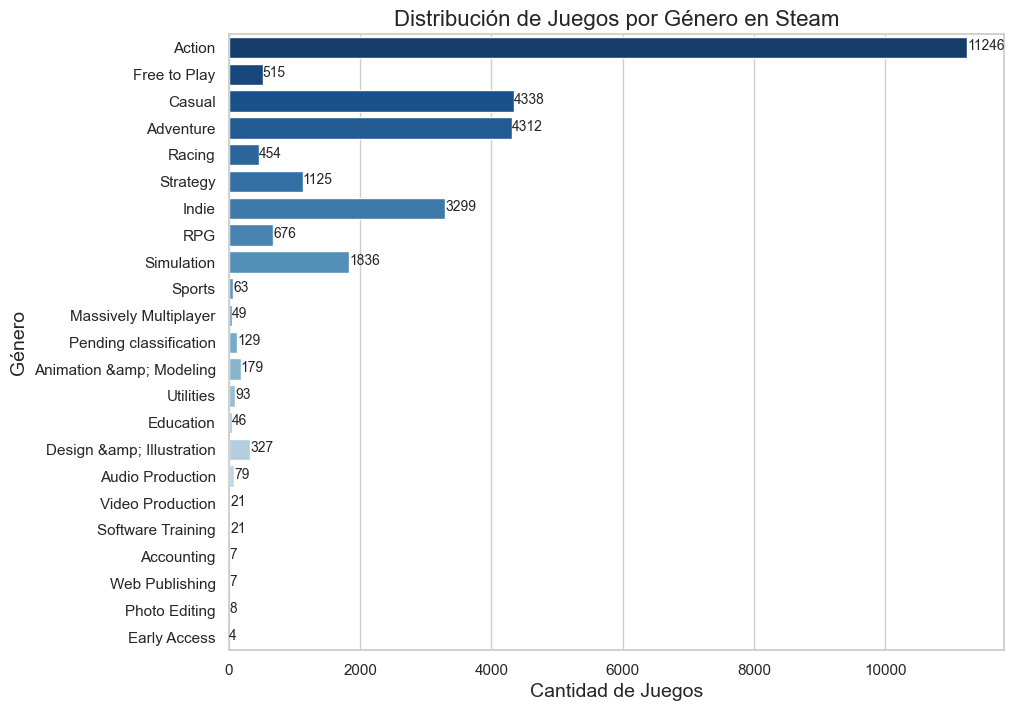

In [12]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 8))
ax = sns.countplot(data=df_steam_games, y='genres', orient='h', palette='Blues_r')

ax.set_title('Distribución de Juegos por Género en Steam', fontsize=16)
ax.set_xlabel('Cantidad de Juegos', fontsize=14)
ax.set_ylabel('Género', fontsize=14)

for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width() + 0.1, p.get_y() + 0.5), fontsize=10)

plt.show()

**Observación**

Los generos con mayor cantidad de juegos son:
* **Action** con 11246
* **Casual** con 4338
* **Adventure** con 4312
* **Indie** con 3299

EDA del dataframe 'user_reviews'

In [13]:
df_user_reviews = pd.read_parquet('dataset_limpio/user_reviews.parquet')
df_user_reviews.head()

,user_id,item_id,recommend,posted_year,sentiment_analysis
0,76561197970982479,1250,True,2011,2
1,76561197970982479,22200,True,2011,1
2,76561197970982479,43110,True,2011,2
3,js41637,251610,True,2014,2
4,js41637,227300,True,2013,2


In [14]:
df_user_reviews.info() #vemos la informacion de las columnas del dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59161 entries, 0 to 59160
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             59161 non-null  object
 1   item_id             59161 non-null  int64 
 2   recommend           59161 non-null  bool  
 3   posted_year         59161 non-null  int64 
 4   sentiment_analysis  59161 non-null  int64 
dtypes: bool(1), int64(3), object(1)
memory usage: 1.9+ MB


In [15]:
df_user_reviews.isnull().sum() # vemos la cantidad de nulos 

user_id               0
item_id               0
recommend             0
posted_year           0
sentiment_analysis    0
dtype: int64

### Variables categóricas

* **user_id** : id del usuario 
* **recommend** : valor booleano que indica si se ha realizado review
* **sentiment_analysis** : clasificación de las reviews en:
    * positivo = 2 
    * negativo = 0 
    * neutral = 1

### `user_id`

In [16]:
#Vemos la cantidad de usuarios de juegos de steam en la plataforma
user_quantity = len(df_user_reviews['user_id'].unique())
user_quantity

25467

**Observación**
- Contamos con 25467 usuarios únicos en el dataframe

### `recommend`

In [17]:
#vemos la cantidad de recomendaciones hechas
recommend_quantity = df_user_reviews['recommend'].value_counts()
recommend_quantity

recommend
True     52350
False     6811
Name: count, dtype: int64

**Observación**
- Contabilizamos con 52350 recomendaciones de parte de los usuarios.

### `sentiment_analysis`

In [19]:
#vemos el conteo del analisis de sentimiento para cada caso
sentiment_analysis_quantity = df_user_reviews['sentiment_analysis'].value_counts()
sentiment_analysis_quantity

sentiment_analysis
2    32181
1    22000
0     4980
Name: count, dtype: int64

**Observación**
- Las reviews con sentimientos positivos fueron 32181
- Las reviews con sentimientos neutrales fueron 22000
- Las reviews con sentimientos negativos fueron 4980

### Variables numéricas

* **posted_year** : fecha en que se realiza la review

### `posted_year`

In [21]:
date = df_user_reviews['posted_year'].describe()
date

count    59161.00000
mean      2013.93325
std          1.09823
min       2010.00000
25%       2013.00000
50%       2014.00000
75%       2015.00000
max       2015.00000
Name: posted_year, dtype: float64

Procedemos a realizar un countplot de las reviews por fecha

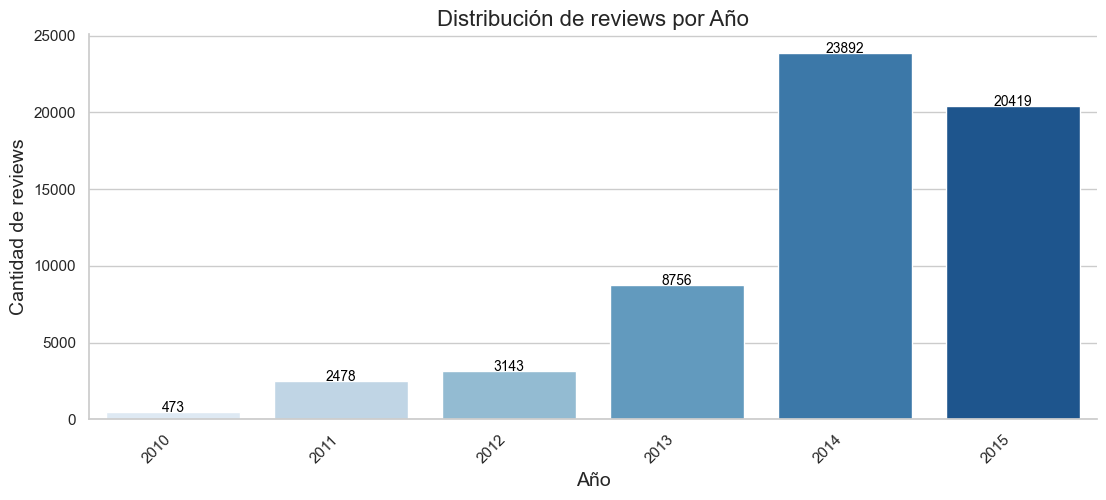

In [28]:
sns.set(style="whitegrid")

plt.figure(figsize=(13, 5))

ax = sns.countplot(data=df_user_reviews, x=df_user_reviews["posted_year"], palette="Blues") 

ax.set_title('Distribución de reviews por Año', fontsize=16)
ax.set_xlabel('Año', fontsize=14)
ax.set_ylabel('Cantidad de reviews', fontsize=14)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black')

sns.despine()
plt.show()

**Observación**
- La cantidad total de posteos es de 59161.
- El año con más posteos fue 2014 con 23892 
- El año con menos posteos fue 2010 con 473

EDA de users_items.parquet

In [29]:
df_users_items = pd.read_parquet('dataset_limpio/items_normalized.parquet')
df_users_items.head()

,item_id,item_name,steam_id,items_count,user_id,playtime_hours
0,10,Counter-Strike,76561197970982479,277,76561197970982479,0.10
1,30,Day of Defeat,76561197970982479,277,76561197970982479,0.12
2,300,Day of Defeat: Source,76561197970982479,277,76561197970982479,78.88
3,240,Counter-Strike: Source,76561197970982479,277,76561197970982479,30.88
4,3830,Psychonauts,76561197970982479,277,76561197970982479,5.55


In [30]:
df_users_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3246375 entries, 0 to 3246374
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   item_id         int64  
 1   item_name       object 
 2   steam_id        int64  
 3   items_count     int64  
 4   user_id         object 
 5   playtime_hours  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 148.6+ MB


In [31]:
#vemos los nulos del dataframe
df_users_items.isnull().sum()

item_id           0
item_name         0
steam_id          0
items_count       0
user_id           0
playtime_hours    0
dtype: int64

### Variables categóricas

* **item_name** : titulo del juego Steam

### `item_name`

In [32]:
#vemos la cantidad de juegos en el dataframe
games_quantity = len(df_users_items['item_name'].unique())
games_quantity

10024

In [34]:
#vemos la cantidad de juegos por nombre
games = df_users_items['item_name'].value_counts()
games

item_name
Counter-Strike: Global Offensive    42842
Garry's Mod                         41639
Left 4 Dead 2                       34535
Unturned                            34089
Terraria                            28244
                                    ...  
Castles                                 1
The Empty Inn                           1
Dr. Bulbaceous                          1
Cue Club 2                              1
Arachnophobia                           1
Name: count, Length: 10024, dtype: int64

**Observación**
- Steam cuenta con la cantidad de 10024 juegos únicos (software) en su catálogo.
- El software mas consumido es "Counter-Strike: Global Offensive" con 42842 registros

### Variables numéricas

* **items_count** : cantidad de juegos Steam que consume un usuario
* **playtime_hours** : cantidad de horas que juega un usuario

### `items_count`

In [35]:
items_count = df_users_items.groupby('user_id')['items_count'].unique().explode() # obtenemos la cantidad de juegos por usuario
items_count= pd.DataFrame(items_count) # convertimos a dataframe
items_count_user = items_count.sort_values('items_count', ascending=False) # ordenamos de mayor a menor
items_count_user

,items_count
user_id,
phrostb,7762
thugnificent,6700
chidvd,6410
piepai,6132
mayshowganmore,5027
...,...
76561198072737788,1
76561198069543256,1
76561198063914266,1


Procedemos a hacer dos graficos:
- Grafico de distribución de cantidad de items por usuario 
- Grafico de caja de cantidad de items por usuario

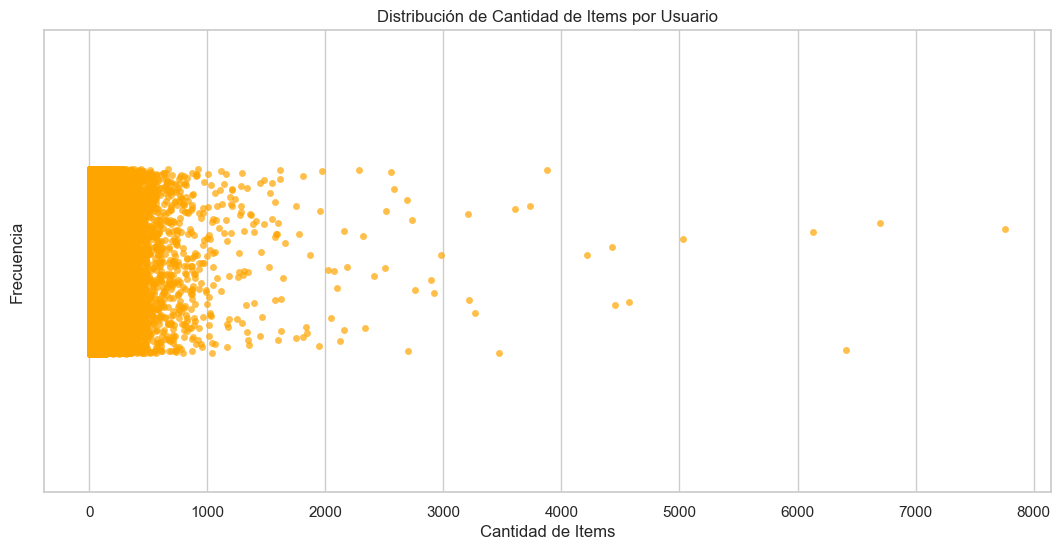

In [38]:
sns.set(style="whitegrid", palette="plasma")

plt.figure(figsize=(13, 6))
sns.stripplot(data=items_count_user, x='items_count', color="orange", jitter=0.2, alpha=0.7)
plt.xlabel('Cantidad de Items')
plt.ylabel('Frecuencia')
plt.title('Distribución de Cantidad de Items por Usuario')
plt.show()

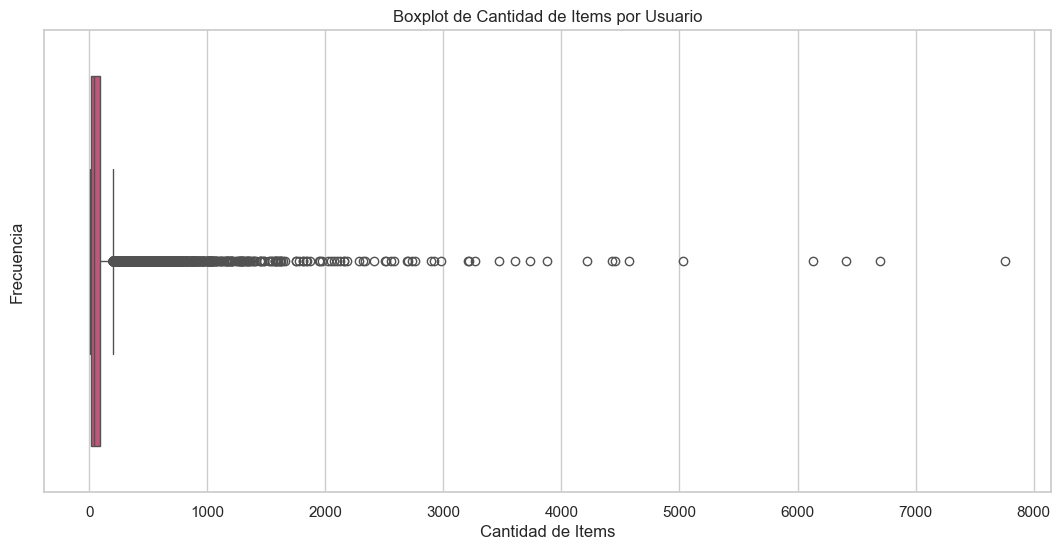

In [42]:
sns.set(style="whitegrid", palette="plasma")

plt.figure(figsize=(13, 6))
sns.boxplot(data=items_count_user, x='items_count', palette="plasma")
plt.xlabel('Cantidad de Items')
plt.ylabel('Frecuencia')
plt.title('Boxplot de Cantidad de Items por Usuario')
plt.show()

In [43]:
items_count_user.describe()

,items_count
count,68403
unique,924
top,2
freq,1545


In [44]:
items_count_user['items_count'].max()

7762

In [46]:
items_count_user.sort_values(by='items_count', ascending=False).head(5)

,items_count
user_id,
phrostb,7762
thugnificent,6700
chidvd,6410
piepai,6132
mayshowganmore,5027


**Observación**
- La cantidad total artículos consumidos es de 68403. 
- El `user_id` con más cantidad de artículos consumidos es `phrostb` con 7762

### `playtime_hours`

In [47]:
time_count = df_users_items.groupby('user_id')['playtime_hours'].unique().explode()  # Obtenemos el tiempo de juego por usuario
time_count = pd.DataFrame(time_count)  # Convertimos a DataFrame
time_count['playtime_hours'] = time_count['playtime_hours']
time_count_user = time_count.sort_values('playtime_hours', ascending=False)  # Ordenamos de mayor a menor
time_count_user

,playtime_hours
user_id,
wolop,10712.88
Evilutional,10588.25
76561198019826668,10540.87
76561198039832932,10223.52
tsunamitad,10001.13
...,...
76561198078062945,0.02
76561198101995099,0.02
76561198066935199,0.02


Procedemos a hacer dos graficos:
- Grafico de distribución de tiempo de juego por usuario 
- Grafico de caja de tiempo de juego por usuario

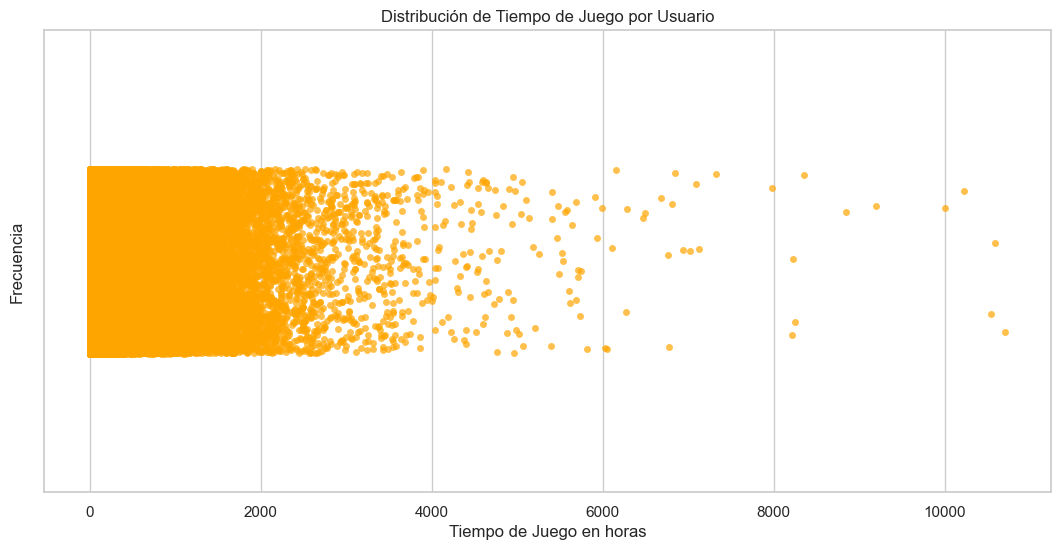

In [50]:
sns.set(style="whitegrid", palette="plasma")

plt.figure(figsize=(13, 6))
sns.stripplot(data=time_count_user, x='playtime_hours', color="orange", jitter=0.2, alpha=0.7)
plt.xlabel('Tiempo de Juego en horas')
plt.ylabel('Frecuencia')
plt.title('Distribución de Tiempo de Juego por Usuario')
plt.show()

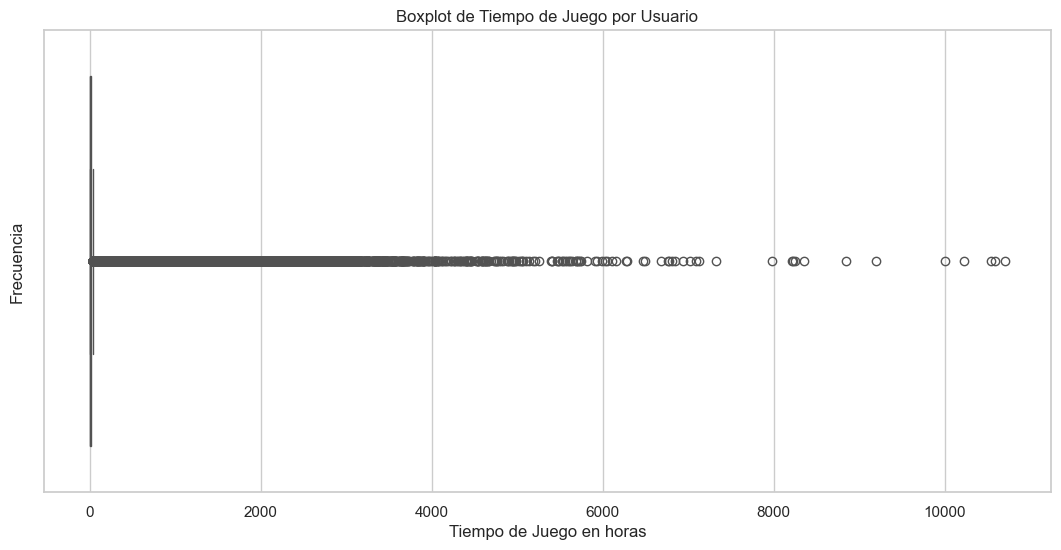

In [51]:
sns.set(style="whitegrid", palette="plasma")

plt.figure(figsize=(13, 6))
sns.boxplot(data=time_count_user, x='playtime_hours', palette="plasma")
plt.xlabel('Tiempo de Juego en horas')
plt.ylabel('Frecuencia')
plt.title('Boxplot de Tiempo de Juego por Usuario')
plt.show()

**Observación**
- El `user_id` con más cantidad de tiempo consumido en juegos Steam es `wolop` con 10713 horas

### Procedemos a crear los datasets finales para las funciones de los endpoints y el modelo de recomendacion

En cuestion a las dos primeras funciones ('PlayTimeGenre' y 'UserForGenre') emplearemos los archivos 'steam_games.parquet' y 'users_items.parquet'. En un principio pensamos que era conveniente juntar ambos datasets utilizando la columna 'item_id'. Sin embargo, dado el tamaño de 'users_items.parquet', se opto por trabajar con ambos archivos de manera independiente

En cuanto a las 3 funciones restantes ('UsersRecommend', 'UsersWorstDeveloper' y 'sentiment_analysis') emplearemos los datasets 'steam_games.parquet' y 'user_reviews.parquet'.
El metodo empleado sera un merge entre ambos archivos y para evitar posibles errores, filtraremos entre los años 2010 y 2015, ya que ambos archivos comparten dicha informacion.

In [52]:
# filtramos los juegos lanzados entre 2010 y 2015
df_steam_games = df_steam_games[df_steam_games['release_year'].between(2010, 2015, inclusive='both')]
df_steam_games.head()

,publisher,app_name,reviews_url,price,item_id,developer,release_year,genres
9,Qucheza,Uncanny Islands,http://steamcommunity.com/app/768570/reviews/?...,0.00,768570,Qucheza,2015,Action
34,Zachary M Thomas,United Tactics,http://steamcommunity.com/app/662570/reviews/?...,0.00,662570,Zachary M Thomas,2015,Strategy
35,Breakout Studio,Life of Rome,http://steamcommunity.com/app/381620/reviews/?...,0.00,381620,Breakout Studio,2015,Indie
36,zha7,Idle Adventure,http://steamcommunity.com/app/714020/reviews/?...,0.00,714020,"zha7,Phaedruns,Yingke Wu",2015,Adventure
237,Erik Svedäng,Blueberry Garden,http://steamcommunity.com/app/29160/reviews/?b...,4.99,29160,Erik Svedäng,2015,Adventure


In [53]:
# filtramos los reviews realizados entre 2010 y 2015
df_user_reviews = df_user_reviews[df_user_reviews['posted_year'].between(2010, 2015, inclusive='both')]
df_user_reviews.head()

,user_id,item_id,recommend,posted_year,sentiment_analysis
0,76561197970982479,1250,True,2011,2
1,76561197970982479,22200,True,2011,1
2,76561197970982479,43110,True,2011,2
3,js41637,251610,True,2014,2
4,js41637,227300,True,2013,2


In [54]:
#unimos 'df_steam_games' con 'df_user_reviews'
df_steamgames_and_reviews = pd.merge(df_steam_games, df_user_reviews, left_on='item_id', right_on='item_id')

In [55]:
df_steamgames_and_reviews.head()

,publisher,app_name,reviews_url,price,item_id,developer,release_year,genres,user_id,recommend,posted_year,sentiment_analysis
0,Octoshark Studios,"Pirates, Vikings, and Knights II",http://steamcommunity.com/app/17570/reviews/?b...,0.0,17570,Octoshark Studios,2010,Action,76561198010653835,True,2015,2
1,Octoshark Studios,"Pirates, Vikings, and Knights II",http://steamcommunity.com/app/17570/reviews/?b...,0.0,17570,Octoshark Studios,2010,Action,76561198075581042,True,2014,2
2,Octoshark Studios,"Pirates, Vikings, and Knights II",http://steamcommunity.com/app/17570/reviews/?b...,0.0,17570,Octoshark Studios,2010,Action,GameBrak,True,2015,2
3,Octoshark Studios,"Pirates, Vikings, and Knights II",http://steamcommunity.com/app/17570/reviews/?b...,0.0,17570,Octoshark Studios,2010,Action,CjDoesIntros,True,2014,1
4,Octoshark Studios,"Pirates, Vikings, and Knights II",http://steamcommunity.com/app/17570/reviews/?b...,0.0,17570,Octoshark Studios,2010,Action,76561198075920681,True,2015,1


In [56]:
#vemos como quedo conformado el df fusionado
df_steamgames_and_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35019 entries, 0 to 35018
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   publisher           34587 non-null  object 
 1   app_name            35019 non-null  object 
 2   reviews_url         35019 non-null  object 
 3   price               35019 non-null  float64
 4   item_id             35019 non-null  int64  
 5   developer           35019 non-null  object 
 6   release_year        35019 non-null  int64  
 7   genres              35019 non-null  object 
 8   user_id             35019 non-null  object 
 9   recommend           35019 non-null  bool   
 10  posted_year         35019 non-null  int64  
 11  sentiment_analysis  35019 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(6)
memory usage: 3.0+ MB


Pasamos el df a formato CSV

In [57]:
df_steamgames_and_reviews.to_csv('dataset_funciones/steamgames_and_reviews.csv', index=False, encoding='utf-8')

In [58]:
#Leemos el archivo csv
df_games_and_reviews = pd.read_csv("dataset_funciones/steamgames_and_reviews.csv")

tabla = pa.Table.from_pandas(df_games_and_reviews) # convertimos el dataframe en una tabla
pq.write_table(tabla,"dataset_funciones/steamgames_and_reviews.parquet") # guardamos la tabla en un archivo parquet

### Dataset para el modelo de Recomendación

In [59]:
modelo_item = pd.read_parquet('dataset_limpio/steam_games.parquet')
modelo_item

,publisher,app_name,reviews_url,price,item_id,developer,release_year,genres
0,Kotoshiro,Lost Summoner Kitty,http://steamcommunity.com/app/761140/reviews/?...,4.99,761140,Kotoshiro,2018,Action
1,"Making Fun, Inc.",Ironbound,http://steamcommunity.com/app/643980/reviews/?...,0.00,643980,Secret Level SRL,2018,Free to Play
2,Poolians.com,Real Pool 3D - Poolians,http://steamcommunity.com/app/670290/reviews/?...,0.00,670290,Poolians.com,2017,Casual
3,彼岸领域,弹炸人2222,http://steamcommunity.com/app/767400/reviews/?...,0.99,767400,彼岸领域,2017,Action
4,Trickjump Games Ltd,Battle Royale Trainer,http://steamcommunity.com/app/772540/reviews/?...,3.99,772540,Trickjump Games Ltd,2018,Action
...,...,...,...,...,...,...,...,...
28829,Bidoniera Games,Kebab it Up!,http://steamcommunity.com/app/745400/reviews/?...,1.99,745400,Bidoniera Games,2018,Action
28830,Ghost_RUS Games,Colony On Mars,http://steamcommunity.com/app/773640/reviews/?...,1.99,773640,"Nikita ""Ghost_RUS""",2018,Casual
28831,Sacada,LOGistICAL: South Africa,http://steamcommunity.com/app/733530/reviews/?...,4.99,733530,Sacada,2018,Casual
28832,Laush Studio,Russian Roads,http://steamcommunity.com/app/610660/reviews/?...,1.99,610660,Laush Dmitriy Sergeevich,2018,Indie


Creamos un dataframe solo con las columnas que necesitamos ('item_id', 'app_name' y 'genres')

In [60]:
modelo_item = modelo_item[['item_id', 'app_name', 'genres']]
modelo_item

,item_id,app_name,genres
0,761140,Lost Summoner Kitty,Action
1,643980,Ironbound,Free to Play
2,670290,Real Pool 3D - Poolians,Casual
3,767400,弹炸人2222,Action
4,772540,Battle Royale Trainer,Action
...,...,...,...
28829,745400,Kebab it Up!,Action
28830,773640,Colony On Mars,Casual
28831,733530,LOGistICAL: South Africa,Casual
28832,610660,Russian Roads,Indie


In [61]:
#vemos la informacion de este nuevo df
modelo_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28834 entries, 0 to 28833
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   item_id   28834 non-null  int64 
 1   app_name  28834 non-null  object
 2   genres    28834 non-null  object
dtypes: int64(1), object(2)
memory usage: 675.9+ KB


procedemos a guardar dicho df en formato CSV


In [62]:
modelo_item.to_csv('dataset_limpio/modelo_item.csv', index=False, encoding='utf-8')

In [63]:
modelo_item = pd.read_csv("dataset_limpio/modelo_item.csv") # leemos el archivo csv

tabla = pa.Table.from_pandas(modelo_item) # convertimos el dataframe en una tabla de pyarrow
pq.write_table(tabla,"dataset_limpio/modelo_item.parquet") # exportamos la tabla a parquet